In [1]:
import maze_prob1 as mz
import numpy as np

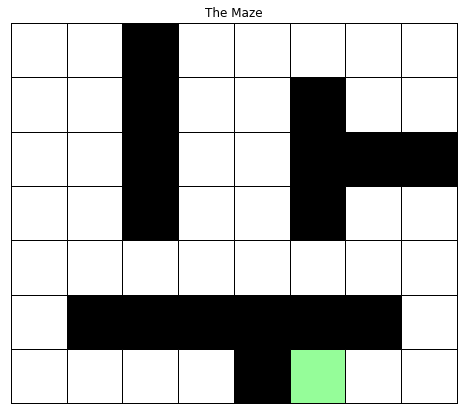

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
mz.draw_maze(maze)

In [8]:
env = mz.Maze(maze)
T = 20
_, policy = mz.dynamic_programming(env, T)

possible state:  3
current state:  (0, 0, 6, 5)
next_state:  (0, 1, 6, 3)
2


In [9]:
method = 'DynProg';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);
mz.animate_solution(maze, path)

In [10]:
end_state = (6,5)
end_states = []
for states in env.map:
    if states[0] == end_state[0] and states[1] == end_state[1]:
        end_states.append(env.map[states])

In [11]:
#s_p = np.zeros((env.n_states))
#s_p[env.map[start]] = 1.0
prev_state = env.map[start]
p_exit = []
for i in range(1,T):
    s = env.map[path[i]]
    s_a = policy[prev_state,i]
    t_l = []
    for end in end_states:
        trans = (env.transition_probabilities[end, prev_state, int(s_a)])
        t_l.append(trans)
    p_exit.append(np.sum(t_l))
    prev_state = s

19


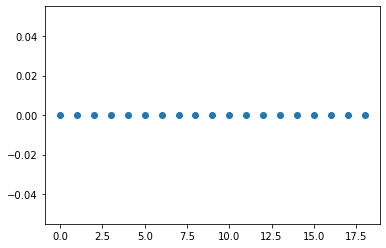

In [12]:
import matplotlib.pyplot as plt
print(len(p_exit))
plt.scatter([t for t in range(len(p_exit))], p_exit)